NAME-ANNU

ROLLNO.-EE21RESCH01010

CHANNEL CODING HOMEWORK 1

In [1]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [5]:
#basic functions

def discrete_entropy(P_x):
  length=P_x.shape[0]
  entropy=0
  for i in range(length):
    entropy+=-P_x[i]*np.log2(P_x[i])
  return entropy

def joint_discrete_entropy(P_x):
  length=P_x.shape[0]
  entropy=0
  for i in range(P_x.shape[0]):
    for j in range(P_x.shape[1]):
      entropy+=-P_x[i,j]*np.log2(P_x[i,j])
  return entropy

def conditional_entropy(P_x_y,P_x):
  entropy=0
  for i in range(P_x_y.shape[0]):
    for j in range(P_x_y.shape[1]):
      entropy+=-P_x_y[i,j]*np.log2(P_x_y[i,j]/P_x[i])
  return entropy

def mutual_information(P_x_y,P_x,P_y):
  entropy=0
  for i in range(P_x_y.shape[0]):
    for j in range(P_x_y.shape[1]):
      entropy+=P_x_y[i,j]*np.log2(P_x_y[i,j]/(P_x[i]*P_y[j]))
  return entropy

def entropy_ybyx(px,p_ybyx):
  pxy=px*p_ybyx
  return (sum([px[i]*discrete_entropy(p_ybyx[i,:]) for i in range(len(px))]))[0]

In [6]:
#QUESTION 1

# Given data -transition probability matrix

p_0by1=0.5982945793
p_1by0=0.7007205513
#p_0by1=0.7706450303
#p_1by0=0.9011422678
b=p_0by1
a=p_1by0

transional_prob=np.array([[1-p_1by0,p_1by0],[p_0by1,1-p_0by1]])

# from the derivation ,by differentiating h_y and h_y|x to get maximum capacity,we get results and using that result directly,

const =(((p_0by1**p_0by1)*((1-p_0by1)**(1-p_0by1)))/((p_1by0**p_1by0)*((1-p_1by0)**(1-p_1by0))) )**(1/(1-p_1by0-p_0by1))
p = (1-(const+1)*p_0by1)/((1+const)*(1-p_1by0-p_0by1)) #input distribution p which acieves capacity

py0=p*(1-a)+(1-p)*b
py1=a*p+(1-b)*(1-p)

py=np.array([py0,py1])
px = np.array([p , 1-p]).reshape((2,1))
py1 = (px.T@transional_prob)[0]

pxy=transional_prob.T@px
Hy = discrete_entropy(py)
Hx = discrete_entropy(px)
Hylx =entropy_ybyx(px,transional_prob)
Hxy= joint_discrete_entropy(pxy)
Hybyx=Hxy-Hx
C = Hy - Hylx

print("Transitional probability matrix is :",transional_prob)
print('px = ',px)
print('py = ',py)
print('py = ',py1)
print('Hy = ',Hy)
print('Hybyx = ',Hylx)
print('Capacity is = ', C)



Transitional probability matrix is : [[0.29927945 0.70072055]
 [0.59829458 0.40170542]]
px =  [[0.50546295]
 [0.49453705]]
py =  [0.44715351 0.55284649]
py =  [0.44715351 0.55284649]
Hy =  0.9919267519247422
Hybyx =  0.9256738612808089
Capacity is =  0.06625289064393336


In [7]:
#QUESTION 2

#Discrete memoryless channel

def dmc(x): #dmc for each bit
    out_alphabet = ['0','1']
    pygivenx = {'0':[0.29927945,0.70072055] , '1':[0.59829458,0.40170542] }
    y = np.random.choice(out_alphabet,1,p=list(pygivenx[x]))
    return y[0]

def dmc_n(xn): #dmc for sequence of bits
    channel_seqout = ''
    for x in xn:
        channel_seqout += dmc(str(x))
    return channel_seqout

def list_to_string(xn):
  yn=''
  for m in xn:
    yn+=str(m)
  return yn

def string_to_list(xn):
  yn=np.array([int(x) for x in xn])
  return yn

In [9]:
#ML rule for decoding

def decoder_ML(channel_seqout,p_0by1,p_1by0):
    decoded_x = ''
    for y in channel_seqout:
        if (p_0by1+p_1by0)<1:   #Take x such that transition probability for that x got maximized
            decoded_x += y
        else :
            decoded_x += str((int(y)+1)%2)
    return decoded_x


# Hamming distance calculation
def calculate_hammingDist(input_seq,out_seq):
  i=0
  count=0
  while(i<len(input_seq)):
    if(input_seq[i]!=out_seq[i]):
      count+=1
    i+=1
  return count

#error rate using hamming distNCE
def calc_error_rate(input_seq,out_seq):
  length=len(input_seq)
  errors=calculate_hammingDist(input_seq,out_seq)
  error_rate=errors/length
  return error_rate

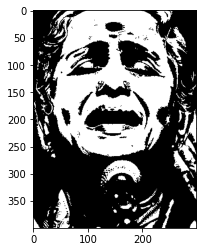

(<matplotlib.image.AxesImage at 0x7fa9b88a3d50>, None)

In [11]:
#Problem 2
#Image data is given to us in question
#Please load the data in your drive 
mss = np.load('mss.npy')
plt.imshow(mss,cmap='gray'), plt.show()

In [12]:
message_array=mss.flatten()

message=list_to_string(message_array)

print("message bits are:",message)
channel_out=dmc_n(message)
print("channel output is :",channel_out)

message bits are: 0000000000000000000000000000000000000000000000011111100000000000011111111111111110000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000001111111111111110000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011110000000000011111111111111100000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000001111111111111111111100011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111100000000000111111111111100000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000111111111111111111111111001110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001110000000000011111111111111100000000

error rate =  0.33569166666666667


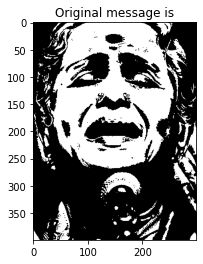

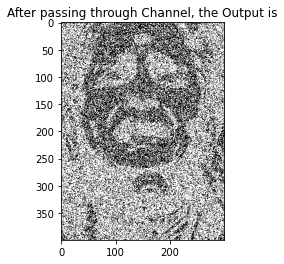

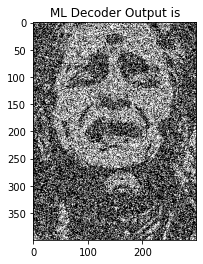

(<matplotlib.image.AxesImage at 0x7fa9b6970cd0>,
 Text(0.5, 1.0, 'ML Decoder Output is'),
 None)

In [13]:
p=mss.shape
mss_out = string_to_list(channel_out)
mss_out = np.reshape(mss_out,p)

p_0by1=0.5982945793
p_1by0=0.7007205513
#p_0by1=0.7706450303
#p_1by0=0.9011422678
decoder_out = decoder_ML(channel_out,p_0by1,p_1by0)
mss_estimate = string_to_list(decoder_out)
mss_estimate=np.reshape(mss_estimate,p)

error_rate = calc_error_rate(message,decoder_out)

print("error rate = ",error_rate)
plt.figure(1)
plt.imshow(mss,cmap='gray'),plt.title('Original message is'), plt.show() 
plt.figure(2)
plt.imshow(mss_out,cmap='gray'), plt.title('After passing through Channel, the Output is') , plt.show()
plt.figure(3)
plt.imshow(mss_estimate,cmap='gray'), plt.title('ML Decoder Output is'),plt.show() 

In [14]:
#Problem 3
#part1
#1/3 Repetition code

def encoder_repetition(xn,rep):
  yn=''
  for y in xn:
    yn+=y*rep
  return yn

def majority_rule(yn,rep):
    output_mk = ''
    for i in range(0,len(yn),rep):
        codeword = yn[i:i+rep]
        if sum(list(map(int,list(codeword)))) <=1 :
            output_mk += '0'
        else : 
            output_mk += '1'
    return output_mk

def decoder_repetition(yn,rep,p_0by1,p_1by0):
  output_mk=majority_rule(yn,rep)
  decoded_bits=decoder_ML(output_mk,p_0by1,p_1by0)
  return decoded_bits

In [15]:
#question 3,part 1

message_array=mss.flatten()

message=list_to_string(message_array)
rep=3
xn_encoded=encoder_repetition(message,3)
#after passing through DMC channel
channel_output_rep=yn = dmc_n(xn_encoded)
print("encoded message bits are:",xn_encoded)

print("channel output for repetion codes is :",channel_output_rep)

decodedout_repetition=decoder_repetition(channel_output_rep,rep,p_0by1,p_1by0)
print("Decoded output for repetition codeis :",decodedout_repetition)
 

error_rate = calc_error_rate(message,decodedout_repetition)

print("error rate for 1/3 repetition = ",error_rate)


encoded message bits are: 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111100000000000000000000000000000000000011111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111100000000000000011111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

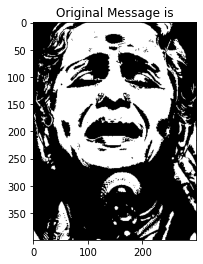

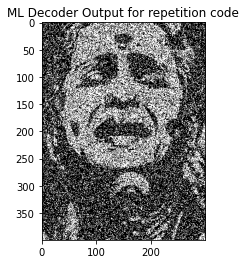

(<matplotlib.image.AxesImage at 0x7fa9b68e4890>,
 Text(0.5, 1.0, 'ML Decoder Output for repetition code'),
 None)

In [16]:
#Visualisation of results
#Channel simulation for repetition codes
p=mss.shape
mss_estimate = np.array([int(x) for x in decodedout_repetition])
mss_estimate=np.reshape(mss_estimate,p)
plt.figure(1)
plt.imshow(mss,cmap='gray'),plt.title('Original Message is'), plt.show() 
plt.figure(2)
plt.imshow(mss_estimate,cmap='gray'),plt.title('ML Decoder Output for repetition code'), plt.show() 

In [18]:
#Question 3 part 2


total_inputComb=[format(i,'05b') for i in range(np.power(2,5))] #2^k i.e 2^5=32
print("All possible input combinations",total_inputComb)
codewords = ['00000','00111','11100','11011']


# Given data -transition probability matrix

p_0by1=0.5982945793
p_1by0=0.7007205513

transional_prob=np.array([[1-p_1by0,p_1by0],[p_0by1,1-p_0by1]])

def calc_pybyx(total_inputComb,codewords,transional_prob):
  Pybyx = np.array([])                  
  for y in codewords:
    for x in total_inputComb:
        tot = 1
        for i in range(len(y)):
            tot*=transional_prob[int(y[i])][int(x[i])]
        Pybyx = np.append(Pybyx,tot)
  Pybyx = np.reshape(Pybyx,(4,32))
  return Pybyx

Pybyx=calc_pybyx(total_inputComb,codewords,transional_prob)
print("Calculated likelihood matrix for all combinations is",Pybyx)


def encoding(text,codes):
                encoded = ""
                for i in range(0,len(text)-1,2):
                    encoded+= codes[text[i:i+2]]
                return encoded

def dmc_block(x):
    out_alphabet = [format(i,'05b') for i in range(np.power(2,5))] #2^k i.e 2^5=32
    pygivenx = {codewords[0] : Pybyx[0,:] , codewords[1] : Pybyx[1,:] ,codewords[2] : Pybyx[2,:] , codewords[3] : Pybyx[3,:]}
    y = np.random.choice(out_alphabet,1,p=pygivenx[x])
    return y[0]

def dmc_block_seq(xn):
    yn = ''
    for i in range(0,len(xn)-(len(codewords[0])-1),len(codewords[0])):
        yn += dmc_block(str(xn[i:i+len(codewords[0])]))
    return yn

def ML_decoder_block(yn,Pybyx):
    inp_alphabet = {0:'00' , 1: '01', 2 : '10' , 3 :'11'}
    out_alphabet = dict(zip(total_inputComb,[i for i in range(np.power(2,5))]))
    estimate_xn =''
    for i in range(0,len(xn)-(len(codewords[0])-1),len(codewords[0])):
        estimate_xn = estimate_xn + inp_alphabet[np.argmax(Pybyx[:,out_alphabet[yn[i:i+5]]])]
    return estimate_xn


All possible input combinations ['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
Calculated likelihood matrix for all combinations is [[0.00240096 0.0056215  0.0056215  0.01316195 0.0056215  0.01316195
  0.01316195 0.03081686 0.0056215  0.01316195 0.01316195 0.03081686
  0.01316195 0.03081686 0.03081686 0.07215332 0.0056215  0.01316195
  0.01316195 0.03081686 0.01316195 0.03081686 0.03081686 0.07215332
  0.01316195 0.03081686 0.03081686 0.07215332 0.03081686 0.07215332
  0.07215332 0.1689368 ]
 [0.01918223 0.01287928 0.01287928 0.00864737 0.01287928 0.00864737
  0.00864737 0.005806   0.04491247 0.03015502 0.03015502 0.0202466
  0.03015502 0.0202466  0.0202466  0.01359392 0.04491247 0.03015502
  0.03015502 0.0202466  0.03015502 0.0202466  0.0202466  0

In [19]:
codes = {'00' : '00000', '01' : '00111', '10' : '11100' , '11' : '11011' } 
#encoding using codes given
xn=encoding(message,codes)

yn =dmc_block_seq(xn)
estimate_mk = ML_decoder_block(yn,Pybyx)
print("2/5 encoded bits are:",xn)
print("2/5 channel output is",yn)
print("2/5 decoded output",estimate_mk)

error_rate = calc_error_rate(message,estimate_mk)
print('error rate for 2/5 code =',error_rate)

2/5 encoded bits are: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111101111100000000000000000000000000000111110111101111011110111101111011110111110000000000000000000000000000000000000000001101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111011110111101111100000000000000000000000000000000000000000000000000000000000000000000000000000000000011111011110111101111011110111101111011000000000000111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111110000000000000000000000000001101111011110111101111011110111101111100000000000000000000000000000000000

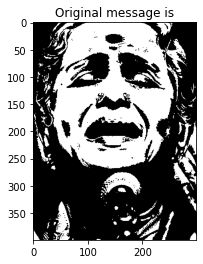

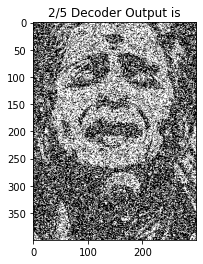

(<matplotlib.image.AxesImage at 0x7fa9b67e1b10>,
 Text(0.5, 1.0, '2/5 Decoder Output is'),
 None)

In [20]:
#Channel simulation for 2/5 code

mss_estimated = np.array([int(x) for x in estimate_mk])
mss_estimated=np.reshape(mss_estimated,mss.shape)
plt.figure(1)
plt.imshow(mss,cmap='gray'),plt.title('Original message is'), plt.show() 
plt.figure(2)
plt.imshow(mss_estimated,cmap='gray'),plt.title('2/5 Decoder Output is'), plt.show() 